## 서울시 범죄 현황 시각화

In [26]:
import json
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
crime_analy_norm = pd.read_csv('D:/data/02. crime_in_Seoul_final.csv', index_col=0, encoding='utf-8')
geo_path = 'D:/data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

crime_analy_norm.tail(2)

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
중구,0.230769,0.205128,0.383721,0.599387,0.555972,74.747475,87.5,100.0,42.511628,89.707865,134593,1023,0.394995,78.893394
중랑구,0.615385,0.358974,0.317829,0.471425,0.790605,91.463415,100.0,87.5,62.211709,85.714286,412780,916,0.510844,85.377882


In [5]:
# 살인 발생 건수 시각화

# 지도 설정
my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start= 11,
    tiles='Stamen Toner'
)
# json 파일로 구별 경계 추가
folium.Choropleth(
    geo_data=geo_str, # 우리나라 경계선 좌표값
    data = crime_analy_norm['살인'],
    columns=[crime_analy_norm.index, crime_analy_norm['살인']],
    key_on = 'feature.id',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='정규화된 살인발생 건수' 
    
).add_to(my_map)
my_map

In [6]:
# 정규화된 5대 범죄 발생 건수
# 지도 설정
my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start= 11,
    tiles='Stamen Toner'
)
# json 파일로 구별 경계 추가
folium.Choropleth(
    geo_data=geo_str, # 우리나라 경계선 좌표값
    data = crime_analy_norm['범죄'],
    columns=[crime_analy_norm.index, crime_analy_norm['범죄']],
    key_on = 'feature.id',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='정규화된 5대 범죄 발생 건수' 
    
).add_to(my_map)
my_map

In [7]:
# 인구 대비 범죄 발생 건수
tmp_criminal = crime_analy_norm['범죄'] / crime_analy_norm['인구수']

# 지도 생성
my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start= 11,
    tiles='Stamen Toner'
)
# json 파일로 구별 경계 추가
folium.Choropleth(
    geo_data=geo_str, # 우리나라 경계선 좌표값
    data = tmp_criminal,
    columns=[crime_analy_norm.index, tmp_criminal],
    key_on = 'feature.id',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='인구 대비 범죄 발생 건수' 
    
).add_to(my_map)
my_map

In [8]:
# 경찰서별 정보 + 범죄발생 정보

crime_analy_station = pd.read_csv('D:/data/02. crime_in_Seoul_raw.csv', encoding='utf-8')
crime_analy_station.head()

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
0,강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958
1,강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822
2,강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637388,127.027324
3,강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,양천구,37.539783,126.829997
4,관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474379,126.950975


In [11]:
# 데이터 정규화
col = ['살인검거','강도검거','강간검거','절도검거','폭력검거']
tmp = crime_analy_station[col] / crime_analy_station[col].max() # 0 ~ 1

crime_analy_station['검거'] = np.mean(tmp, axis=1) # numpy axis 1 = 행(가로), pandas axis 1 = 열(세로)
crime_analy_station.tail()

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng,검거
26,종로,113.0,137.0,3.0,6.0,0.0,4.0,389.0,952.0,1135.0,1291.0,종로구,37.575558,126.984867,0.238103
27,종암,42.0,51.0,5.0,5.0,1.0,2.0,344.0,680.0,815.0,932.0,성북구,37.602059,127.032158,0.195242
28,중랑,150.0,164.0,14.0,14.0,7.0,8.0,1052.0,1691.0,2712.0,3164.0,중랑구,37.618692,127.104714,0.675873
29,중부,96.0,141.0,3.0,3.0,2.0,2.0,485.0,1204.0,1164.0,1335.0,중구,37.563646,126.989580,0.277182
30,혜화,64.0,101.0,6.0,6.0,2.0,2.0,379.0,988.0,842.0,972.0,종로구,37.571840,126.998856,0.240065


In [12]:
# 경찰서 위치 마커
my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start= 11
)

for idx, rows in crime_analy_station.iterrows():
    folium.Marker(
        location=[rows['lat'], rows['lng']]
    ).add_to(my_map)

my_map

In [17]:
my_map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start= 11
)

folium.Choropleth(
    geo_data=geo_str, # 우리나라 경계선 좌표값
    data = crime_analy_norm['범죄'],
    columns=[crime_analy_norm.index, crime_analy_norm['범죄']],
    key_on = 'feature.id',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2 
).add_to(my_map)

for idx, rows in crime_analy_station.iterrows():
    folium.CircleMarker(
        location=[rows['lat'], rows['lng']],
        radius=rows['검거'] * 50,  # 원을 그릴때 크기 차이를 보여주기 위해
        popup=rows['구분'] + ':' + '%.2f' %rows['검거'],
        color='#3186cc',
        fill=True,
        fill_color='#3186cc'
    ).add_to(my_map)
my_map    

### 범죄 발생과 장소 관계 파악

In [18]:
# 범죄 발생 장소 데이터
crime_loc_raw = pd.read_csv('D:/data/02. crime_in_Seoul_location.csv', thousands=',',encoding='euc-kr')
crime_loc_raw.head()

,범죄명,장소,발생건수
0,살인,"아파트, 연립 다세대",12
1,살인,단독주택,30
2,살인,노상,22
3,살인,상점,1
4,살인,"숙박업소, 목욕탕",4


In [19]:
crime_loc_raw['범죄명'].unique()

array(['살인', '강도', '강간.추행', '절도', '폭력'], dtype=object)

In [20]:
crime_loc_raw['장소'].unique()

array(['아파트, 연립 다세대', '단독주택', '노상', '상점', '숙박업소, 목욕탕', '유흥 접객업소', '사무실',
       '역, 대합실', '교통수단', '유원지 ', '학교', '금융기관', '기타'], dtype=object)

In [21]:
crime_loc = crime_loc_raw.pivot_table(
    crime_loc_raw, index=['장소'], columns=['범죄명'], aggfunc=[np.sum]
)
crime_loc

sum                      
             발생건수                      
범죄명         강간.추행  강도  살인     절도     폭력
장소                                     
교통수단          691   0   0    457    222
금융기관            2   1   1   1081     42
기타           2128  67  65  21734  26382
노상            986  87  22   9329  24535
단독주택          395  15  30   2241   3579
사무실           132   8   1    682   1229
상점             95  34   1   4403    852
숙박업소, 목욕탕     389   9   4    828    303
아파트, 연립 다세대   284  18  12   1504   2839
역, 대합실        181   0   0    356    272
유원지            59   2   2    367    424
유흥 접객업소       398  13   8   2035   2645
학교             33   0   0    400    203

In [22]:
# 필요없는 칼럼 삭제
crime_loc.columns = crime_loc.columns.droplevel([0,1])
crime_loc.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,691,0,0,457,222
금융기관,2,1,1,1081,42
기타,2128,67,65,21734,26382
노상,986,87,22,9329,24535
단독주택,395,15,30,2241,3579


In [23]:
# 정규화
col = ['살인','강도','강간','절도','폭력']
crime_loc_norm = crime_loc / crime_loc.max()
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592
기타,1.000000,0.770115,1.000000,1.000000,1.000000
노상,0.463346,1.000000,0.338462,0.429235,0.929990
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661


In [24]:
# 종합 칼럼 추가 후 평균값 삽입
crime_loc_norm['종합'] = np.mean(crime_loc_norm, axis=1)
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력,종합
장소,,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415,0.070832
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592,0.015830
기타,1.000000,0.770115,1.000000,1.000000,1.000000,0.954023
노상,0.463346,1.000000,0.338462,0.429235,0.929990,0.632207
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661,0.211669


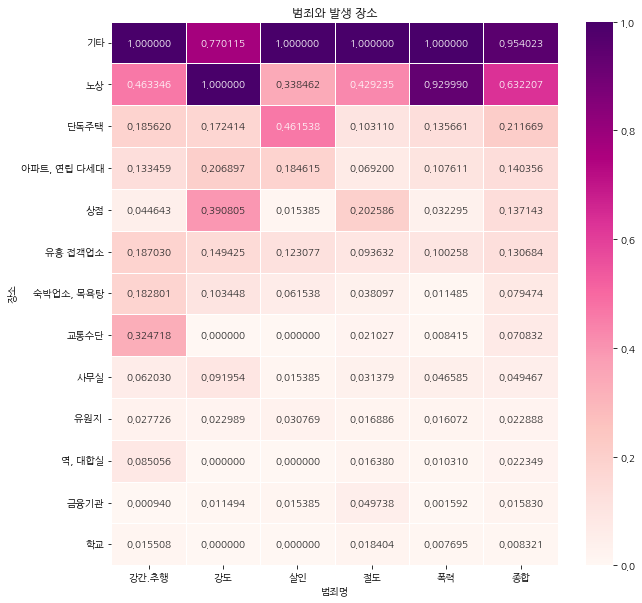

In [27]:
# heatmap으로 확인
crime_loc_norm_sort = crime_loc_norm.sort_values(by='종합', ascending=False)

def drawGraph():
    plt.figure(figsize=(10,10))
    sns.heatmap(crime_loc_norm_sort, annot=True, fmt='f', linewidths=0.5, cmap='RdPu')
    plt.title('범죄와 발생 장소')
    plt.show()

drawGraph()